In [71]:
import pandas as pd
import numpy as np
import os

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow

from sklearn.feature_extraction import img_to_graph

import skimage
import scipy

train = ["prostate_fold_0.txt",
         "prostate_fold_1.txt",
         "prostate_fold_2.txt",
         "prostate_fold_3.txt",
         "prostate_fold_4.txt"]

test = "prostate_test.txt"

train_list = np.concatenate([np.loadtxt(i, dtype= str) for i in train])
test_list = np.loadtxt(test, str)

In [156]:
train2=["lits_fold_0.txt",
        "lits_fold_1.txt",
        "lits_fold_2.txt",
        "lits_fold_3.txt",
        "lits_fold_4.txt"]

test2 = "lits_test.txt"

train_list2 = np.concatenate([np.loadtxt(i, dtype= str) for i in train2])

In [73]:
class Spectral:

    def __init__(self, ds, k):
        self.ds = ds
        self.k = k

    def transform(self, im, mask):
    #def transform(self, patient_num, centered=True, write=True):
        """Return a downsampled mask along with a spectrally transformed downsampled image 

        Args:
            im (array): input image
            mask (): region of image corresponding to cancer
            write (bool, optional): write to file. Defaults to True.

        Returns:
            returns: centered spectral transform of image
        """
        OG_IM_SHAPE = im.shape
        dim = downsample(im, self.ds)
        dmask = downsample(mask, self.ds)
        g = nx.Graph( img_to_graph(dim) )
        nlm = nx.normalized_laplacian_matrix(g)

        new_data = sparse_eigvec(nlm, self.k)

        return dmask, new_data

In [78]:
def sparse_eigvec(n, k=4):

    a, b = scipy.sparse.linalg.eigs(n, k+ 1, which='SR')

    a = np.real(a)
    b = np.real(b)

    new_data = b[:,1:k+1]
    return new_data

def downsample(img_array, df=20):
    # first, change to 0-1
    if np.max(img_array) > 0:
        img_array = img_array / np.max(img_array)
    return skimage.measure.block_reduce(img_array[:, :], (df, df), np.mean)


In [79]:
npname = os.getcwd() + "/SpectralProstate/downsample10/Mask/"
npname2 = os.getcwd() + "/ProstateX/Masks/"

class ProstateX:

    
    def __init__(self, patient_num, slice_num=None):
        self.patient_num = patient_num
        self.slice_num = slice_num

    def image_path(self):
        #im_string = "p"+"0000"+"slice"+".png"
        diff = len(str(self.patient_num)) - 4

        t = str(self.patient_num)
        t = t.zfill(4)

        return f"ProstateX/Processed/p{t}slice{self.slice_num}.png"
    
    def patient_str(self):
        diff = len(str(self.patient_num)) - 4

        t = str(self.patient_num)
        t = t.zfill(4)
        return f"p{t}"


    def mask_path(self, slice_num):
        #im_string = "p"+"0000"+"slice"+".png"
        diff = len(str(self.patient_num)) - 4
        t = str(self.patient_num)
        t = t.zfill(4)
        return f"ProstateX/Masks/p{t}slice{slice_num}.png"
    
    def image(self):
        return imread(self.image_path())
    
    def mask(self):
        return imread(self.mask_path())
    
    def nonzero_mask_pixel_count(self):
        return self.mask().sum()
    
    def patient_subpaths(self):
        return [x for x in os.listdir('ProstateX/Processed') if x.startswith(self.patient_str()) and \
                imread(npname2 + x).sum() > 0]
    
    def patient_subpaths2(self):
        return [x for x in os.listdir('ProstateX/Processed') if x.startswith(self.patient_str())]


In [80]:
Xtrain = [a.removesuffix('.png') + ".txt" for a in train_list]
Xtest = [a.removesuffix('.png') + ".txt" for a in test_list]

In [83]:
Spec = Spectral(10,2)
for i in Xtrain + Xtest:
    pname = "/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/" + i
    if not os.path.isfile(pname):
        print(i)
        i2 = i.removesuffix('txt') + 'png'
        m = imread("ProstateX/Masks/" + i2)
        im = imread("ProstateX/Processed/" + i2)

        m[m<0.5] = 0
        m[m>0.5] = 1
        dmask, newdata = Spec.transform(im, m)
        comm_path = f"SpectralProstate/downsample10/"

        np.savetxt(comm_path + "Mask/" + i, dmask)
        np.savetxt(comm_path + "Processed/" + i, newdata)
        

p0134slice20.txt
p0134slice3.txt
p0134slice4.txt
p0090slice0.txt
p0090slice1.txt
p0090slice15.txt
p0090slice16.txt
p0090slice17.txt
p0090slice18.txt
p0082slice0.txt
p0082slice1.txt
p0082slice18.txt
p0185slice0.txt
p0185slice1.txt
p0185slice14.txt
p0185slice15.txt
p0185slice16.txt
p0185slice17.txt
p0185slice18.txt
p0185slice2.txt
p0117slice0.txt
p0117slice1.txt
p0117slice19.txt
p0117slice2.txt
p0117slice20.txt
p0117slice21.txt
p0117slice22.txt
p0117slice3.txt
p0117slice4.txt
p0175slice0.txt
p0175slice1.txt
p0175slice16.txt
p0175slice17.txt
p0175slice18.txt
p0175slice19.txt
p0175slice2.txt
p0175slice20.txt
p0086slice0.txt
p0086slice1.txt
p0086slice19.txt
p0086slice20.txt
p0135slice0.txt
p0135slice1.txt
p0135slice16.txt
p0135slice17.txt
p0135slice18.txt
p0135slice2.txt
p0135slice3.txt
p0135slice4.txt
p0135slice5.txt
p0105slice0.txt
p0105slice1.txt
p0105slice20.txt
p0172slice0.txt
p0172slice20.txt
p0191slice0.txt
p0191slice1.txt
p0191slice2.txt
p0160slice0.txt
p0160slice1.txt
p0160slice17.

In [85]:
12*60 / len(Xtrain + Xtest)

0.1728276524243879

In [88]:

reta = [] 
retb = []

for j in ret:
    reta.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/" +j)
    retb.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Mask/" + j)

In [90]:
X_train = np.concatenate([np.loadtxt(i) for i in reta], 0)
y_train = np.concatenate([np.loadtxt(i).flatten() for i in retb])


In [116]:
reta = [] 
retb = []

for j in Xtest:
    reta.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/" +j)
    retb.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Mask/" + j)

X_test = np.concatenate([np.loadtxt(i) for i in reta], 0)
y_test = np.concatenate([np.loadtxt(i).flatten() for i in retb])

In [92]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

y_train[y_train >= 0.5] = 1
y_train[y_train < 0.5] = 0

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Prostate Training Set Spectrally Transformed')

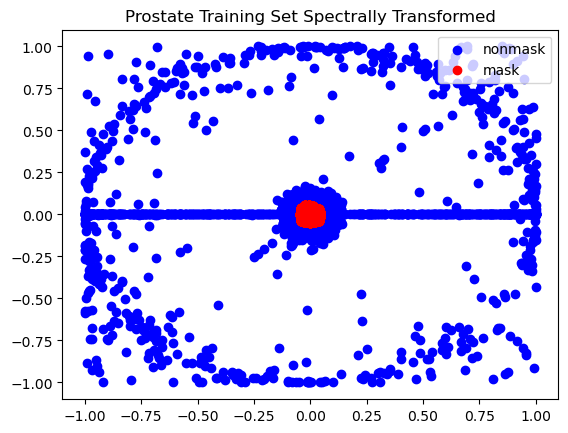

In [95]:
plt.scatter(*X_resampled[y_resampled==0].T, alpha=1, c='b', label="nonmask")
plt.scatter(*X_resampled[y_resampled==1].T, alpha=1, c='r', label="mask")
plt.legend(loc=1)

plt.title("Prostate Training Set Spectrally Transformed")

In [94]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(4, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
             # metrics=[tf.keras.metrics.IoU(num_classes=2, 
             # target_class_ids=[1])]
              metrics=['accuracy']
              )

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model to the training data
history = model.fit(X_resampled, y_resampled, epochs=2, batch_size=32,
                    validation_data=(X_test, y_test), 
                    bcallbacks=[early_stop])


2023-05-10 07:32:10.482162: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2


2023-05-10 07:32:15.090959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/liamjeske/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


337047/337047 [==============================] - 193s 572us/step - loss: 0.5129 - accuracy: 0.7390 - val_loss: 0.5264 - val_accuracy: 0.7071
Epoch 2/2
337047/337047 [==============================] - 188s 558us/step - loss: 0.5114 - accuracy: 0.7400 - val_loss: 0.5765 - val_accuracy: 0.6754


In [122]:
i = Xtest.index('p0056slice7.txt')

pred = model.predict(X_test)

Xnew = np.loadtxt("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/p0056slice7.txt")


32335/32335 [==============================] - 10s 304us/step


In [153]:
from sklearn.metrics import precision_score as precision, recall_score as recall, jaccard_score as IOU
from sklearn.metrics import f1_score as F1
y_test[y_test<0.5] = 0
y_test[y_test>=0.5] = 1


IOU(y_test, pred > 0.5), precision(y_test, pred > 0.5), recall(y_test, pred > 0.5), F1(y_test, pred > 0.5)

(0.07532633878957976,
 0.07653246744961947,
 0.8269800785827531,
 0.1400994955156951)

48/48 [==============================] - 0s 785us/step


(-0.5, 38.5, 38.5, -0.5)

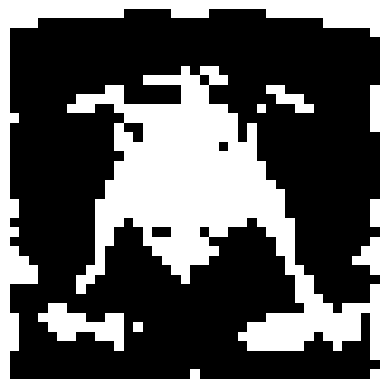

In [135]:
plt.imshow(model.predict(Xnew).reshape((39,39)) >0.5,cmap='Greys_r')
plt.axis('off')

# LITS

In [157]:
train2, test2


(['lits_fold_0.txt',
  'lits_fold_1.txt',
  'lits_fold_2.txt',
  'lits_fold_3.txt',
  'lits_fold_4.txt'],
 'lits_test.txt')

In [307]:
train_list2 = [np.loadtxt(i, dtype= str) for i in train2]
test_list2 = np.array(np.loadtxt(test2, dtype= str))


In [308]:
list(train_list2[0])

['p67slice101.png',
 'p67slice104.png',
 'p67slice107.png',
 'p67slice110.png',
 'p67slice113.png',
 'p67slice116.png',
 'p67slice119.png',
 'p67slice122.png',
 'p67slice125.png',
 'p67slice128.png',
 'p67slice131.png',
 'p67slice134.png',
 'p67slice137.png',
 'p67slice140.png',
 'p67slice143.png',
 'p67slice146.png',
 'p67slice149.png',
 'p67slice152.png',
 'p67slice155.png',
 'p67slice158.png',
 'p67slice82.png',
 'p67slice85.png',
 'p67slice88.png',
 'p67slice91.png',
 'p67slice94.png',
 'p67slice97.png',
 'p105slice387.png',
 'p105slice390.png',
 'p105slice393.png',
 'p105slice396.png',
 'p105slice399.png',
 'p105slice402.png',
 'p105slice405.png',
 'p105slice408.png',
 'p105slice411.png',
 'p105slice414.png',
 'p105slice417.png',
 'p105slice420.png',
 'p105slice423.png',
 'p105slice426.png',
 'p105slice429.png',
 'p105slice432.png',
 'p105slice435.png',
 'p105slice438.png',
 'p105slice441.png',
 'p105slice444.png',
 'p105slice447.png',
 'p105slice450.png',
 'p105slice453.png',
 'p

In [316]:
def foo():
    LITSpath = "/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/"

    ds = 10

    Spec = Spectral(ds,2)

    for i in list(train_list2[0]) + list(test_list2):
        print(i)
        loc = i.removesuffix(".png")
        print(i)
        imo = plt.imread(LITSpath + "Processed/" + i)
        masko = plt.imread(LITSpath + "Masks/" + i)
        masko[masko>=0.25] = 1
        masko[masko<0.25] = 0
        
    

        dmask, newdata = Spec.transform(imo, masko)
        comm_path = f"SpectralLITS/downsample{ds}/"

        print(dmask.shape)
        print(newdata.shape)
        np.savetxt(comm_path + "Masks/" + loc + ".txt", dmask)
       # np.savetxt(comm_path + "Processed/" + loc + ".txt", newdata)


foo()

p67slice101.png
p67slice101.png
(52, 52)
(2704, 2)
p67slice104.png
p67slice104.png
(52, 52)
(2704, 2)
p67slice107.png
p67slice107.png
(52, 52)
(2704, 2)
p67slice110.png
p67slice110.png
(52, 52)
(2704, 2)
p67slice113.png
p67slice113.png
(52, 52)
(2704, 2)
p67slice116.png
p67slice116.png
(52, 52)
(2704, 2)
p67slice119.png
p67slice119.png
(52, 52)
(2704, 2)
p67slice122.png
p67slice122.png
(52, 52)
(2704, 2)
p67slice125.png
p67slice125.png
(52, 52)
(2704, 2)
p67slice128.png
p67slice128.png
(52, 52)
(2704, 2)
p67slice131.png
p67slice131.png
(52, 52)
(2704, 2)
p67slice134.png
p67slice134.png
(52, 52)
(2704, 2)
p67slice137.png
p67slice137.png
(52, 52)
(2704, 2)
p67slice140.png
p67slice140.png
(52, 52)
(2704, 2)
p67slice143.png
p67slice143.png
(52, 52)
(2704, 2)
p67slice146.png
p67slice146.png
(52, 52)
(2704, 2)
p67slice149.png
p67slice149.png
(52, 52)
(2704, 2)
p67slice152.png
p67slice152.png
(52, 52)
(2704, 2)
p67slice155.png
p67slice155.png
(52, 52)
(2704, 2)
p67slice158.png
p67slice158.png

In [278]:
test_list2

['p108slice414.png',
 'p108slice417.png',
 'p108slice420.png',
 'p108slice423.png',
 'p108slice426.png',
 'p108slice429.png',
 'p108slice432.png',
 'p108slice435.png',
 'p108slice438.png',
 'p108slice441.png',
 'p108slice444.png',
 'p108slice447.png',
 'p108slice450.png',
 'p108slice453.png',
 'p108slice456.png',
 'p108slice459.png',
 'p108slice462.png',
 'p108slice465.png',
 'p108slice468.png',
 'p108slice471.png',
 'p108slice474.png',
 'p108slice477.png',
 'p108slice480.png',
 'p108slice483.png',
 'p108slice486.png',
 'p108slice489.png',
 'p108slice492.png',
 'p108slice495.png',
 'p108slice498.png',
 'p108slice501.png',
 'p108slice504.png',
 'p108slice507.png',
 'p108slice510.png',
 'p108slice513.png',
 'p108slice516.png',
 'p108slice519.png',
 'p108slice522.png',
 'p108slice525.png',
 'p108slice528.png',
 'p108slice531.png',
 'p108slice534.png',
 'p108slice537.png',
 'p108slice540.png',
 'p108slice543.png',
 'p108slice546.png',
 'p108slice549.png',
 'p108slice552.png',
 'p108slice55

In [277]:
[LITSpath + "Processed/"+ i for i in test_list2]

['/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice414.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice417.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice420.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice423.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice426.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice429.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice432.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice435.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice438.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice441.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice444.png',
 '/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p108slice44

In [318]:
train_list2 = list(train_list2[0])

In [319]:
reta = [] 
retb = []

for j in train_list2:
    k = j.removesuffix(".png") + ".txt"
    reta.append("SpectralLITS/downsample10/Processed/" +k)
    retb.append("SpectralLITS/downsample10/Masks/" + k)


X_train2 = np.concatenate([np.loadtxt(i) for i in reta], 0)
y_train2 = np.concatenate([np.loadtxt(i).flatten() for i in retb])

X_train2.shape, y_train2.shape


((2119936, 2), (2119936,))

In [320]:
test_list2 = list(test_list2)

In [322]:
reta = [] 
retb = []

for j in test_list2:
    k = j.removesuffix(".png") + ".txt"
    reta.append("SpectralLITS/downsample10/Processed/" +k)
    retb.append("SpectralLITS/downsample10/Masks/" + k)





X_test2 = np.concatenate([np.loadtxt(i) for i in reta], 0)
y_test2 = np.concatenate([np.loadtxt(i).flatten() for i in retb])

X_test2.shape, y_test2.shape

((2249728, 2), (2249728,))

Text(0.5, 1.0, 'Liver Training Set Spectrally Transformed')

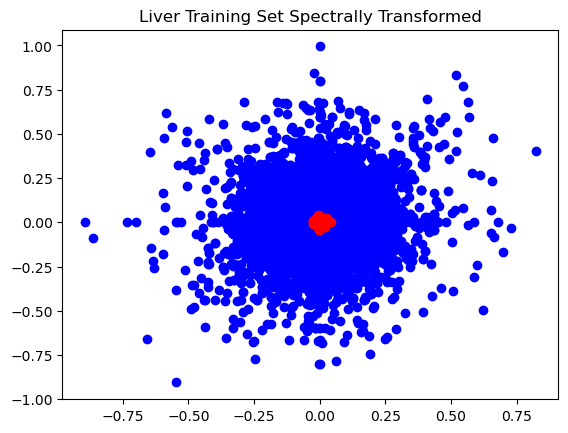

In [333]:
plt.scatter(*X_train2[y_train2==0].T, label='non-mask', c='b')
plt.scatter(*X_train2[y_train2==1].T, label='mask', c='r')
plt.title("Liver Training Set Spectrally Transformed")

In [337]:
ros = RandomOverSampler(random_state=0)

y_train2[y_train2<=0.25] = 0
y_train2[y_train2>0.25] = 1



X_resampled2, y_resampled2 = ros.fit_resample(X_train2, y_train2)


In [339]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


model2 = Sequential()
model2.add(Dense(4, activation='relu', input_dim=2))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
             # metrics=[tf.keras.metrics.IoU(num_classes=2, 
             # target_class_ids=[1])]
              metrics=['accuracy']
              )

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model to the training data
history = model2.fit(X_resampled2, y_resampled2, epochs=2, batch_size=32,
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop])

Epoch 1/2
123007/123007 [==============================] - 60s 488us/step - loss: 0.6127 - accuracy: 0.6580 - val_loss: 0.1323 - val_accuracy: 0.9666
Epoch 2/2
123007/123007 [==============================] - 60s 489us/step - loss: 0.6106 - accuracy: 0.6599 - val_loss: 0.1335 - val_accuracy: 0.9656


In [347]:
30*60 /(  len(X_test2) + len(X_train2)) 

0.0004119309859980081

In [349]:
4e-4

0.0004

In [340]:
preds2 = model2.predict(X_test2)


70304/70304 [==============================] - 20s 279us/step


In [342]:
y_test2[y_test2<=0.25] = 0
y_test2[y_test2>0.25] = 1

IOU(y_test2, preds2 > 0.5), precision(y_test2, preds2 > 0.5), recall(y_test2, preds2 > 0.5), F1(y_test2, preds2 > 0.5)

(0.11416357552246861,
 0.11730451458209074,
 0.8100181998676373,
 0.2049314445931936)

(2704, 2) 2704
85/85 [==============================] - 0s 355us/step


(-0.5, 51.5, 51.5, -0.5)

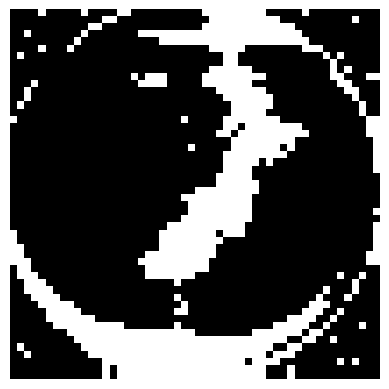

In [369]:
# p28 slice 104
Xnew2 = np.loadtxt("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralLITS/downsample10/Processed/p28slice104.txt")

print(Xnew2.shape, 52**2)

imshow((model2.predict(Xnew2)>0.5).reshape((52,52)), cmap="Greys_r")
plt.axis('off')

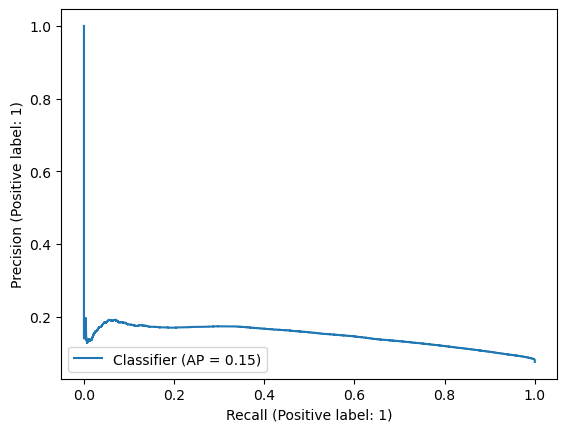

In [372]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay
a, b, c = precision_recall_curve(y_test2, preds2)
PrecisionRecallDisplay.from_predictions(y_test2, preds2)